In [2]:
!pip install azure-cognitiveservices-vision-computervision

Analyzing ./groups.jpg
5 faces detected.
Results saved in detected_faces.jpg


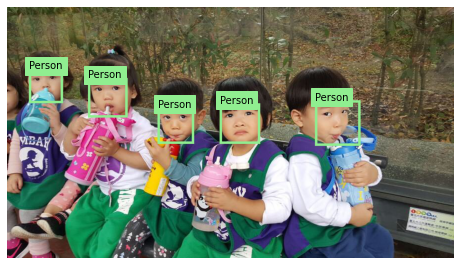

In [13]:
#from dotenv import load_dotenv
import os
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

# Import namespaces
# import namespaces
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


def main():

    global cv_client

    try:
        # Get Configuration Settings
        #load_dotenv()
        cog_endpoint = 'https://azcv0918.cognitiveservices.azure.com/' #os.getenv('COG_SERVICE_ENDPOINT')
        cog_key = 'b0446c3e796545389972804db1add9c0' #os.getenv('COG_SERVICE_KEY')

        # Authenticate Computer Vision client
        credential = CognitiveServicesCredentials(cog_key) 
        cv_client = ComputerVisionClient(cog_endpoint, credential)

        # Detect faces in an image
        image_file = os.path.join('.','groups.jpg')
        AnalyzeFaces(image_file)

    except Exception as ex:
        print(ex)

def AnalyzeFaces(image_file):
    print('Analyzing', image_file)

    # Specify features to be retrieved (faces)
    features = [VisualFeatureTypes.faces]    

    # Get image analysis
    with open(image_file, mode="rb") as image_data:
        analysis = cv_client.analyze_image_in_stream(image_data , features)

        # Get faces
        if analysis.faces:
            print(len(analysis.faces), 'faces detected.')

            # Prepare image for drawing
            fig = plt.figure(figsize=(8, 6))
            plt.axis('off')
            image = Image.open(image_file)
            draw = ImageDraw.Draw(image)
            color = 'lightgreen'

            # Draw and annotate each face
            for face in analysis.faces:
                r = face.face_rectangle
                bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
                draw = ImageDraw.Draw(image)
                draw.rectangle(bounding_box, outline=color, width=5)
                annotation = 'Person'
                # print('face.age', face)
                plt.annotate(annotation,(r.left, r.top), backgroundcolor=color)

            # Save annotated image
            plt.imshow(image)
            outputfile = 'detected_faces.jpg'
            fig.savefig(outputfile)

            print('Results saved in', outputfile)

if __name__ == "__main__":
    main()